In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import glob

# 读取所有文件
height_files = sorted(glob.glob('2020to2024/height_month*.csv'))
salinity_files = sorted(glob.glob('2020to2024/salinity_month*.csv'))
temperature_files = sorted(glob.glob('2020to2024/temperature_month*.csv'))

height_data = np.array([pd.read_csv(file, header=None).values for file in height_files])
salinity_data = np.array([pd.read_csv(file, header=None).values for file in salinity_files])
temperature_data = np.array([pd.read_csv(file, header=None).values for file in temperature_files])

# 将数据整理为 (num_months, height, width) 的形状
height_data = np.array(height_data)
salinity_data = np.array(salinity_data)
temperature_data = np.array(temperature_data)
num_months, height, width = height_data.shape

# 准备特征矩阵和目标变量
features = []
targets = []

for month in range(num_months):
    for i in range(height):
        for j in range(width):
            features.append([salinity_data[month, i, j], temperature_data[month, i, j], month])
            targets.append(height_data[month, i, j])

features = np.array(features)
targets = np.array(targets)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [13]:
# 使用线性回归模型进行训练
model = LinearRegression()
model.fit(X_train, y_train)

# 评估模型性能
score = model.score(X_test, y_test)
print("Model R^2 score:", score)


Model R^2 score: 0.03665128029849141


In [14]:
# 预测未来一个月的数据
future_month = num_months # 实际上是第43个月的数据
future_features = []

for i in range(height):
    for j in range(width):
        future_features.append([salinity_data[-1, i, j], temperature_data[-1, i, j], future_month])

future_features = np.array(future_features)
predicted_heights = model.predict(future_features)

# 将预测结果重塑为原始高度数据的形状
predicted_height_data = height_data.copy()
predicted_height_data = np.append(predicted_height_data, predicted_heights.reshape(1, height, width), axis=0)

print("Predicted height data shape:", predicted_height_data.shape)

Predicted height data shape: (43, 180, 181)


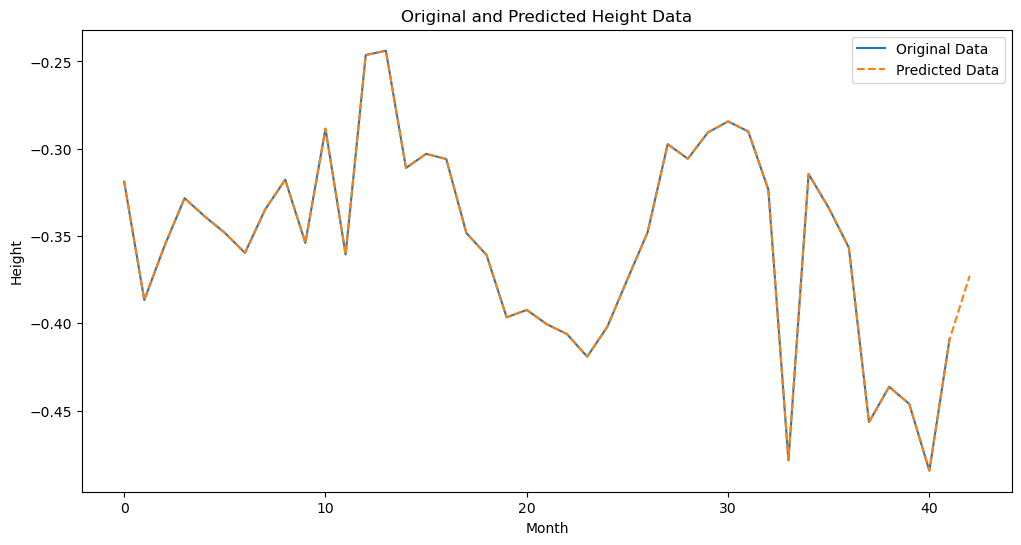

In [15]:
import matplotlib.pyplot as plt

# 选择一个特定的点进行可视化比较
i, j = 90, 90  # 中心点

plt.figure(figsize=(12, 6))
plt.plot(range(num_months), height_data[:, i, j], label='Original Data')
plt.plot(range(num_months + 1), predicted_height_data[:, i, j], label='Predicted Data', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Height')
plt.title('Original and Predicted Height Data')
plt.legend()
plt.show()

Decision Tree R^2 score: 0.41707263259620964
Decision Tree MSE: 0.0031717256029977978
Predicted height data shape: (43, 180, 181)


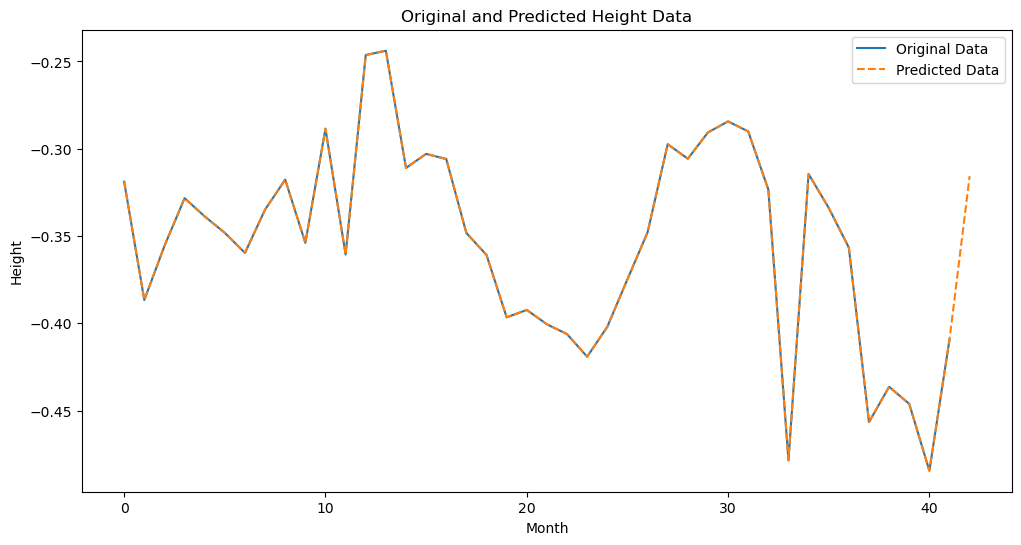

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 使用决策树回归模型进行训练
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# 评估模型性能
dt_predictions = dt_model.predict(X_test)
dt_score = dt_model.score(X_test, y_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Decision Tree R^2 score:", dt_score)
print("Decision Tree MSE:", dt_mse)

# 预测未来一个月的数据
future_month = num_months # 实际上是第43个月的数据
future_features = []

for i in range(height):
    for j in range(width):
        future_features.append([salinity_data[-1, i, j], temperature_data[-1, i, j], future_month])

future_features = np.array(future_features)
predicted_heights = dt_model.predict(future_features)

# 将预测结果重塑为原始高度数据的形状
predicted_height_data = height_data.copy()
predicted_height_data = np.append(predicted_height_data, predicted_heights.reshape(1, height, width), axis=0)

print("Predicted height data shape:", predicted_height_data.shape)

import matplotlib.pyplot as plt

# 选择一个特定的点进行可视化比较
i, j = 90, 90  # 中心点

plt.figure(figsize=(12, 6))
plt.plot(range(num_months), height_data[:, i, j], label='Original Data')
plt.plot(range(num_months + 1), predicted_height_data[:, i, j], label='Predicted Data', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Height')
plt.title('Original and Predicted Height Data')
plt.legend()
plt.show()